In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA


In [3]:

# Load dataset
data = pd.read_csv("Iris.csv", index_col="Id")
X = data.drop("Species", axis=1)




In [4]:
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [5]:
# Apply PCA for 2D visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)



In [6]:
# Gaussian Mixture Model
gmm = GaussianMixture(n_components=3, covariance_type="full", random_state=42)
labels = gmm.fit_predict(X_scaled)



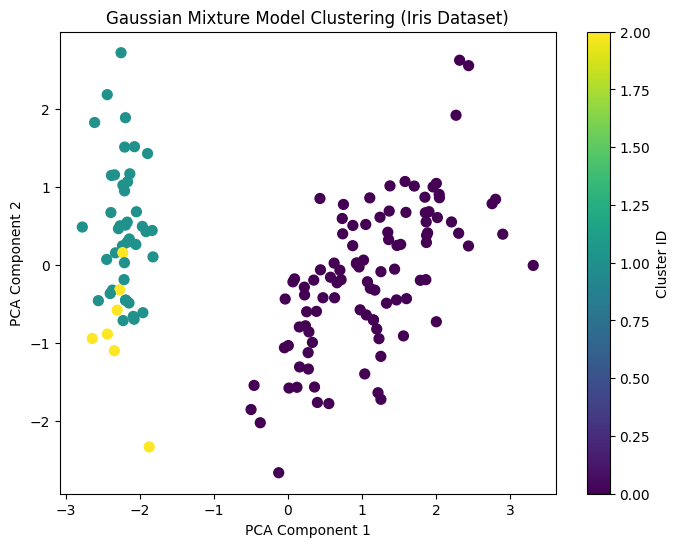

In [7]:
# Plot clusters
plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels, cmap="viridis", s=50)
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("Gaussian Mixture Model Clustering (Iris Dataset)")
plt.colorbar(label="Cluster ID")
plt.show()

In [9]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.manifold import TSNE


In [10]:
# Load dataset
data = pd.read_csv("Iris.csv", index_col="Id")
X = data.drop("Species", axis=1)
y = data["Species"]



In [11]:
# Standardize
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)



In [12]:
# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)



In [13]:
# LDA
lda = LDA(n_components=2)
X_lda = lda.fit_transform(X_scaled, y)



In [14]:
# t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=30)
X_tsne = tsne.fit_transform(X_scaled)


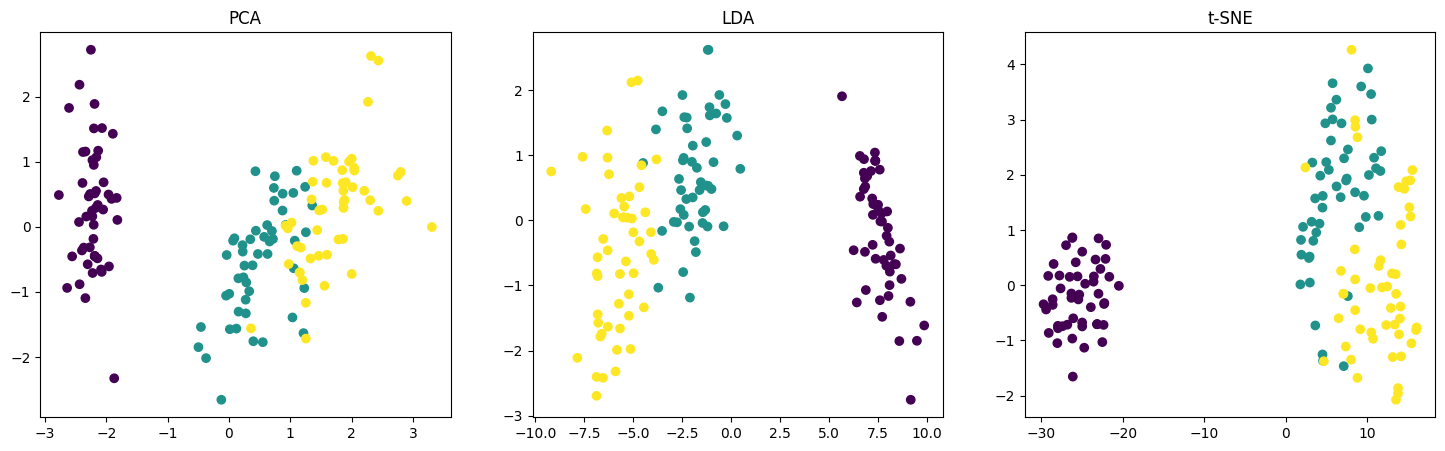

In [15]:
# Plot comparison
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(X_pca[:,0], X_pca[:,1], c=pd.factorize(y)[0], cmap="viridis")
axes[0].set_title("PCA")

axes[1].scatter(X_lda[:,0], X_lda[:,1], c=pd.factorize(y)[0], cmap="viridis")
axes[1].set_title("LDA")

axes[2].scatter(X_tsne[:,0], X_tsne[:,1], c=pd.factorize(y)[0], cmap="viridis")
axes[2].set_title("t-SNE")

plt.show()
